##Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Importig the dataset

In [4]:
df = pd.read_csv('/content/Walmart (1).csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.shape

(6435, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


##Checking null and duplicate values

In [8]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df.duplicated().sum()

0

##Fixing Outliers

In [10]:
def find_outlier_rows(df, col, level='both'):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    
    lower_bound = df[col].quantile(0.25) - 1.5 * iqr
    upper_bound = df[col].quantile(0.75) + 1.5 * iqr

    if level == 'lower':
        return df[df[col] < lower_bound]
    elif level == 'upper':
        return df[df[col] > upper_bound]
    else:
        return df[(df[col] > upper_bound) | (df[col] < lower_bound)]

In [11]:
def count_outliers(df):
    df_numeric = df.select_dtypes(include=['int', 'float'])

    columns = df_numeric.columns

    outlier_cols = [col for col in columns if len(find_outlier_rows(df_numeric, col)) != 0]
    
    outliers_df = pd.DataFrame(columns=['outlier_counts', 'outlier_percent'])

    for col in outlier_cols:
        outlier_count = len(find_outlier_rows(df_numeric, col))
        all_entries = len(df[col])
        outlier_percent = round(outlier_count * 100 / all_entries, 2)

        outliers_df.loc[col] = [outlier_count, outlier_percent]

    return outliers_df

In [12]:
count_outliers(df).sort_values('outlier_counts', ascending=False)

,outlier_counts,outlier_percent
Unemployment,481.0,7.47
Holiday_Flag,450.0,6.99
Weekly_Sales,34.0,0.53
Temperature,3.0,0.05


In [13]:
l = ["Unemployment","Weekly_Sales","Temperature"]
def outlier_removal(l):
    for i in l:
        Q1  = df[i].quantile(0.25)
        Q3  = df[i].quantile(0.75)
        IQR = Q3-Q1
        Uper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        df[i]  = np.where(df[i]>Uper,Uper,(np.where(df[i]<lower,lower,df[i])))
outlier_removal(l)

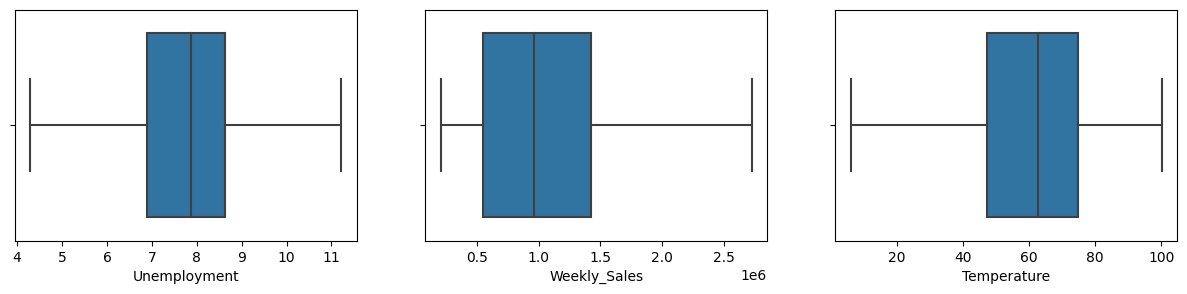

In [14]:
n = 1
cols =["Unemployment","Weekly_Sales","Temperature"]
plt.figure(figsize=(15,3))
for i in cols:
        if n<=3:
            plt.subplot(1,3,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

In [15]:
df['Employment'] = 100 - df['Unemployment']

##Split the Date column

In [16]:
df2 = df.copy()
df2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,91.894
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,91.894
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,91.894
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,91.894
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,91.894


In [17]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Day'] = df2['Date'].dt.weekday
df2['Week'] = df2['Date'].dt.week
df2['Month'] = df2['Date'].dt.month
df2['Year']  = df2['Date'].dt.year
df2.drop('Date',axis=1,inplace=True)
df2.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,91.894,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,91.894,0,18,5,2010


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Employment    6435 non-null   float64
 8   Day           6435 non-null   int64  
 9   Week          6435 non-null   int64  
 10  Month         6435 non-null   int64  
 11  Year          6435 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 603.4 KB


In [19]:
for i in df2.columns:
    print(f'{i}: {df2[i].nunique()}')

Store: 45
Weekly_Sales: 6402
Holiday_Flag: 2
Temperature: 3526
Fuel_Price: 892
CPI: 2145
Unemployment: 335
Employment: 335
Day: 7
Week: 52
Month: 12
Year: 3


##Analyzing Distribution

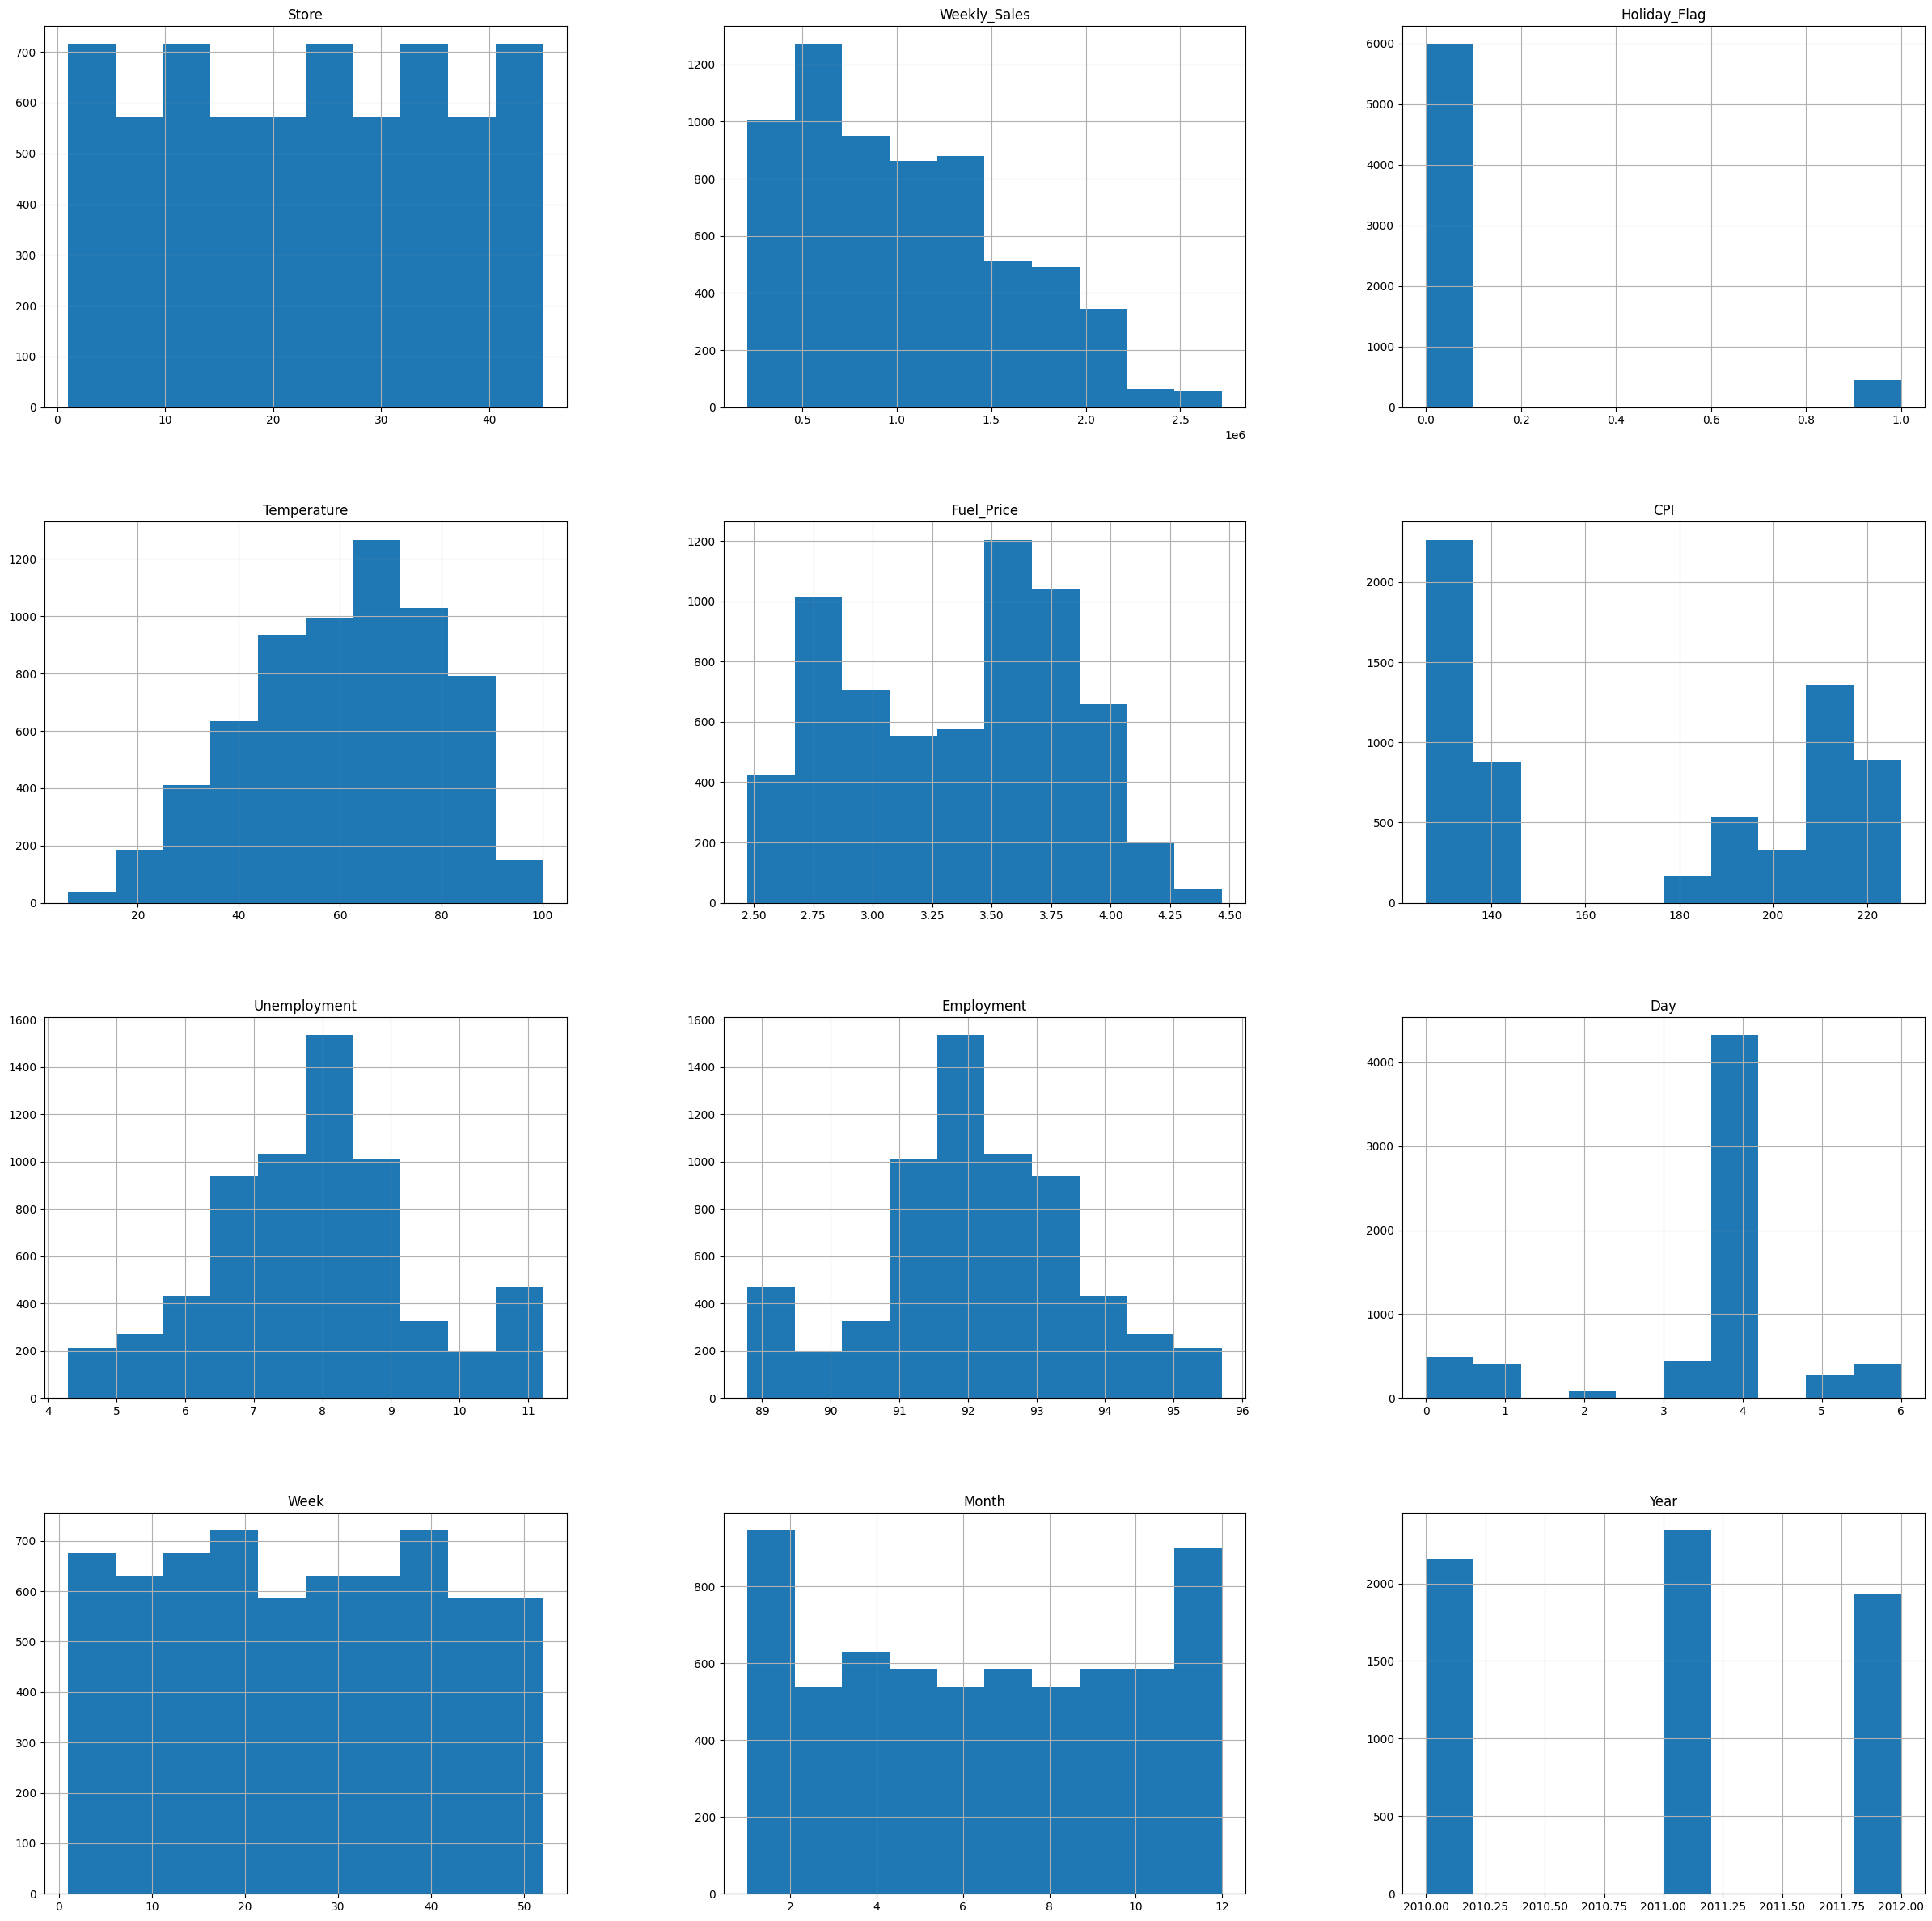

In [20]:
df2.hist(figsize=(30,30))
plt.show()

##Data Exploration

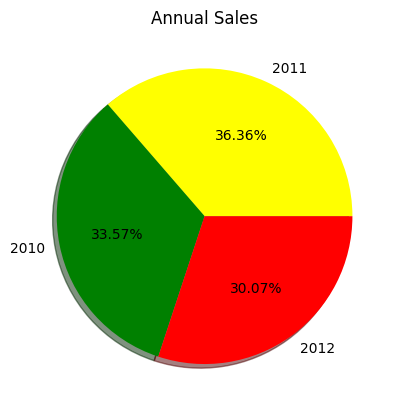

In [21]:
#2011 has the highest annual sales
plt.pie(df2['Year'].value_counts().values,labels =df2['Year'].value_counts().index,
       autopct='%1.2f%%',shadow=True,colors=['yellow','green',"red"])
plt.title('Annual Sales')
plt.show()

In [22]:
#Top 5 stores with most of sales
dis = df2.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).to_frame()
dis.style.background_gradient(cmap='hot_r')
dis.head()

,Weekly_Sales
Store,
20,2.990663e+08
4,2.973575e+08
14,2.870091e+08
13,2.845247e+08
2,2.741628e+08


In [23]:
#least 5 store with least of sales 
dis.tail()

,Weekly_Sales
Store,
38,55159626.42
36,53412214.97
5,45475688.90
44,43293087.84
33,37160221.96


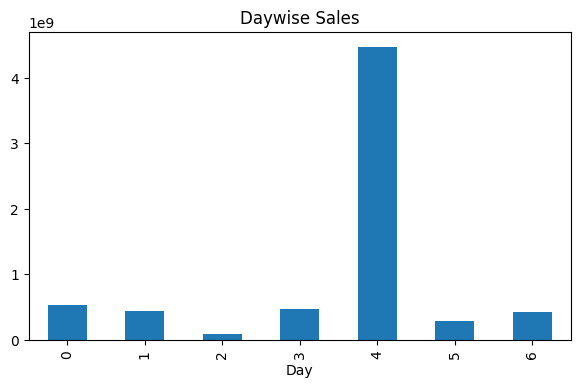

In [24]:
#Day 4(Thursday) has the highest sales of a week
plt.figure(figsize=(7,4))

df2.groupby(['Day'])['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Daywise Sales')

plt.show()

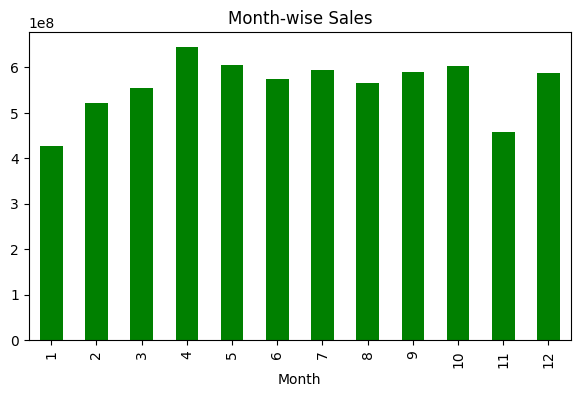

In [25]:
#Month 4(April) has the highest sales.
plt.figure(figsize=(7,4))

df2.groupby('Month')['Weekly_Sales'].sum().plot(kind='bar',color='green')
plt.title('Month-wise Sales')

plt.show()

In [26]:
df3 = df2.copy()
df3.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,91.894,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,91.894,0,18,5,2010


In [27]:
#Map the days and months.
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df3['Day'] = df3['Day'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemenber',12:'December'}
df3['Month']= df3['Month'].map(months)
df3.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,Saturday,17,May,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,Wednesday,48,December,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,Thursday,7,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,91.894,Thursday,8,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,91.894,Sunday,18,May,2010


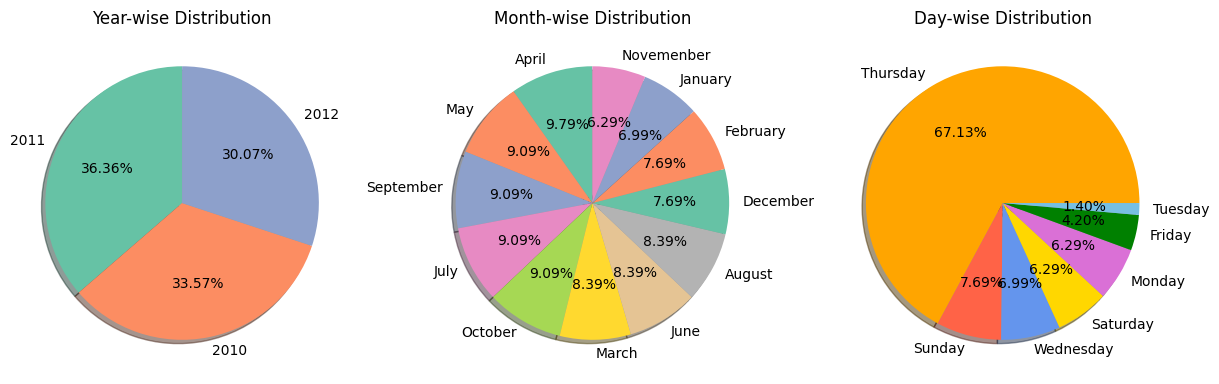

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.pie(df3['Year'].value_counts().values, labels =df3['Year'].value_counts().index,
autopct = '%1.2f%%',startangle=90, shadow=True,colors=sns.color_palette('Set2'))  
plt.title('Year-wise Distribution')
plt.grid()

plt.subplot(1, 3, 2)
plt.pie(df3['Month'].value_counts().values, labels =df3['Month'].value_counts().index,
autopct = '%1.2f%%',startangle=90, shadow=True,colors=sns.color_palette('Set2'))
plt.title('Month-wise Distribution')
plt.grid()

plt.subplot(1, 3, 3)
plt.pie(df3['Day'].value_counts().values, labels =df3['Day'].value_counts().index,
autopct = '%1.2f%%', shadow=True,colors=["Orange",'tomato', 'cornflowerblue', 'gold', 'orchid', 'green',"#77BFE2"]) 
plt.title('Day-wise Distribution')
plt.grid()
plt.show()

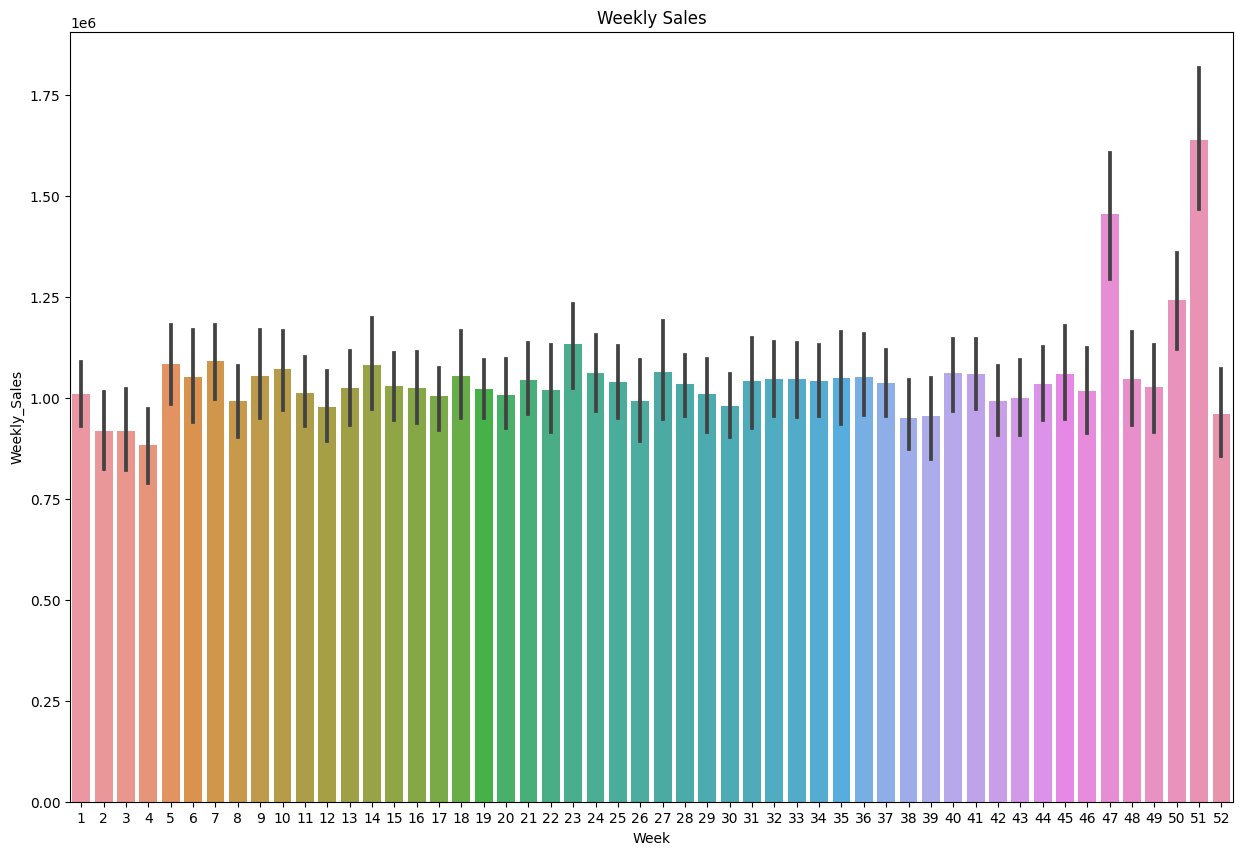

In [29]:
#51 week has the highest sales.
plt.figure(figsize=(15,10))
sns.barplot(df3,x= 'Week',y='Weekly_Sales')
plt.title('Weekly Sales')

plt.show()

In [30]:
pivot_table = df3.pivot_table(index='Month', columns='Year', values='Weekly_Sales')
pivot_table

Year,2010,2011,2012
Month,,,
April,1.021177e+06,1.033220e+06,1.014127e+06
August,1.025212e+06,1.044895e+06,1.064514e+06
December,1.175253e+06,1.248201e+06,1.025078e+06
February,1.064372e+06,1.042273e+06,1.057997e+06
January,9.386639e+05,9.420697e+05,9.567817e+05
July,1.023702e+06,9.976049e+05,1.025480e+06
June,1.055082e+06,1.038471e+06,1.082920e+06
March,1.034590e+06,1.011263e+06,1.025510e+06
May,1.039303e+06,1.015565e+06,1.053948e+06


<Figure size 1500x1200 with 0 Axes>

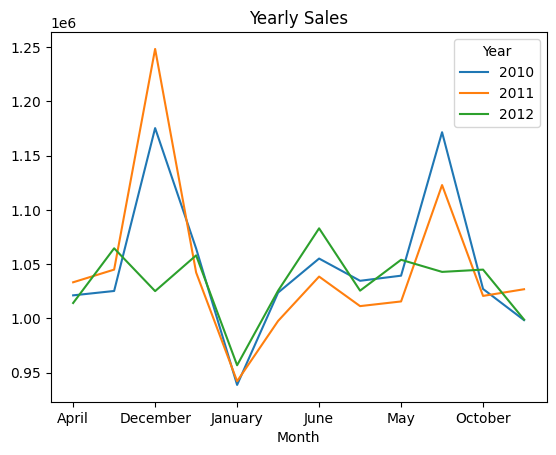

In [31]:
plt.figure(figsize=(15,12))
monthly_sales = pd.pivot_table(df3, index = "Month", columns = "Year", values = "Weekly_Sales")
monthly_sales.plot()
plt.title('Yearly Sales')
plt.show()

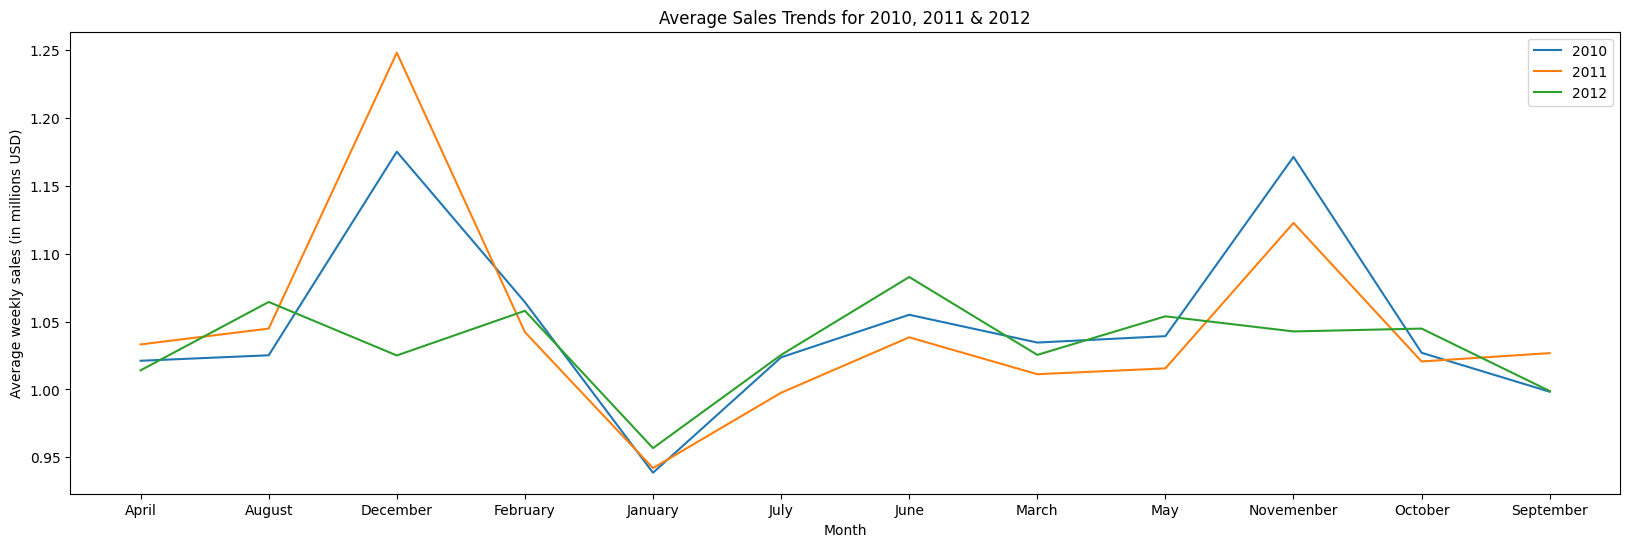

In [32]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x=pivot_table.index, y=pivot_table[2010]/1e6, ax=ax, label='2010')
sns.lineplot( x=pivot_table.index, y=pivot_table[2011]/1e6, ax=ax, label='2011')
sns.lineplot( x=pivot_table.index, y=pivot_table[2012]/1e6, ax=ax, label='2012')

plt.ylabel('Average weekly sales (in millions USD)')
plt.title('Average Sales Trends for 2010, 2011 & 2012')

plt.legend()
plt.show()

In [33]:
# filter out non-holiday and holiday weekly sales 
non_holiday_sales = df3[df3['Holiday_Flag'] == 0]
holiday_sales = df3[df3['Holiday_Flag'] == 1]

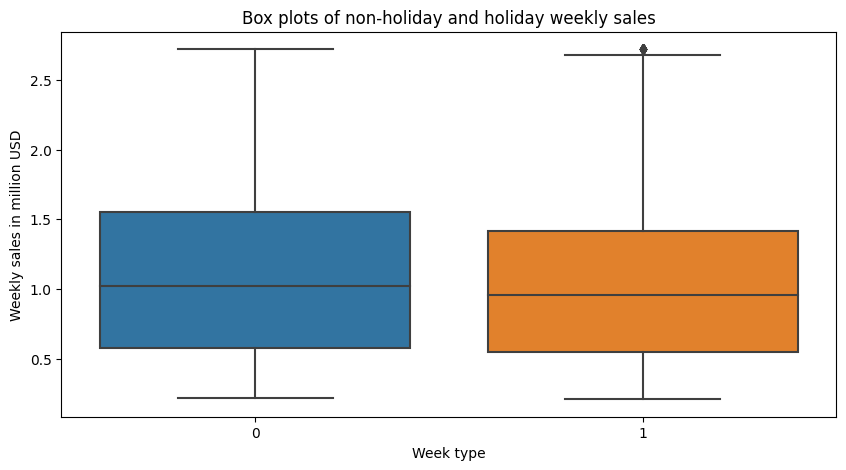

In [34]:
#Both holiday and non-holiday weekly sales have similar spread. However, the bigger sales happen during the holiday weeks
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=[holiday_sales['Weekly_Sales']/1e6, non_holiday_sales['Weekly_Sales']/1e6])
plt.ylabel('Weekly sales in million USD')
plt.xlabel('Week type')
plt.title('Box plots of non-holiday and holiday weekly sales')
plt.show()

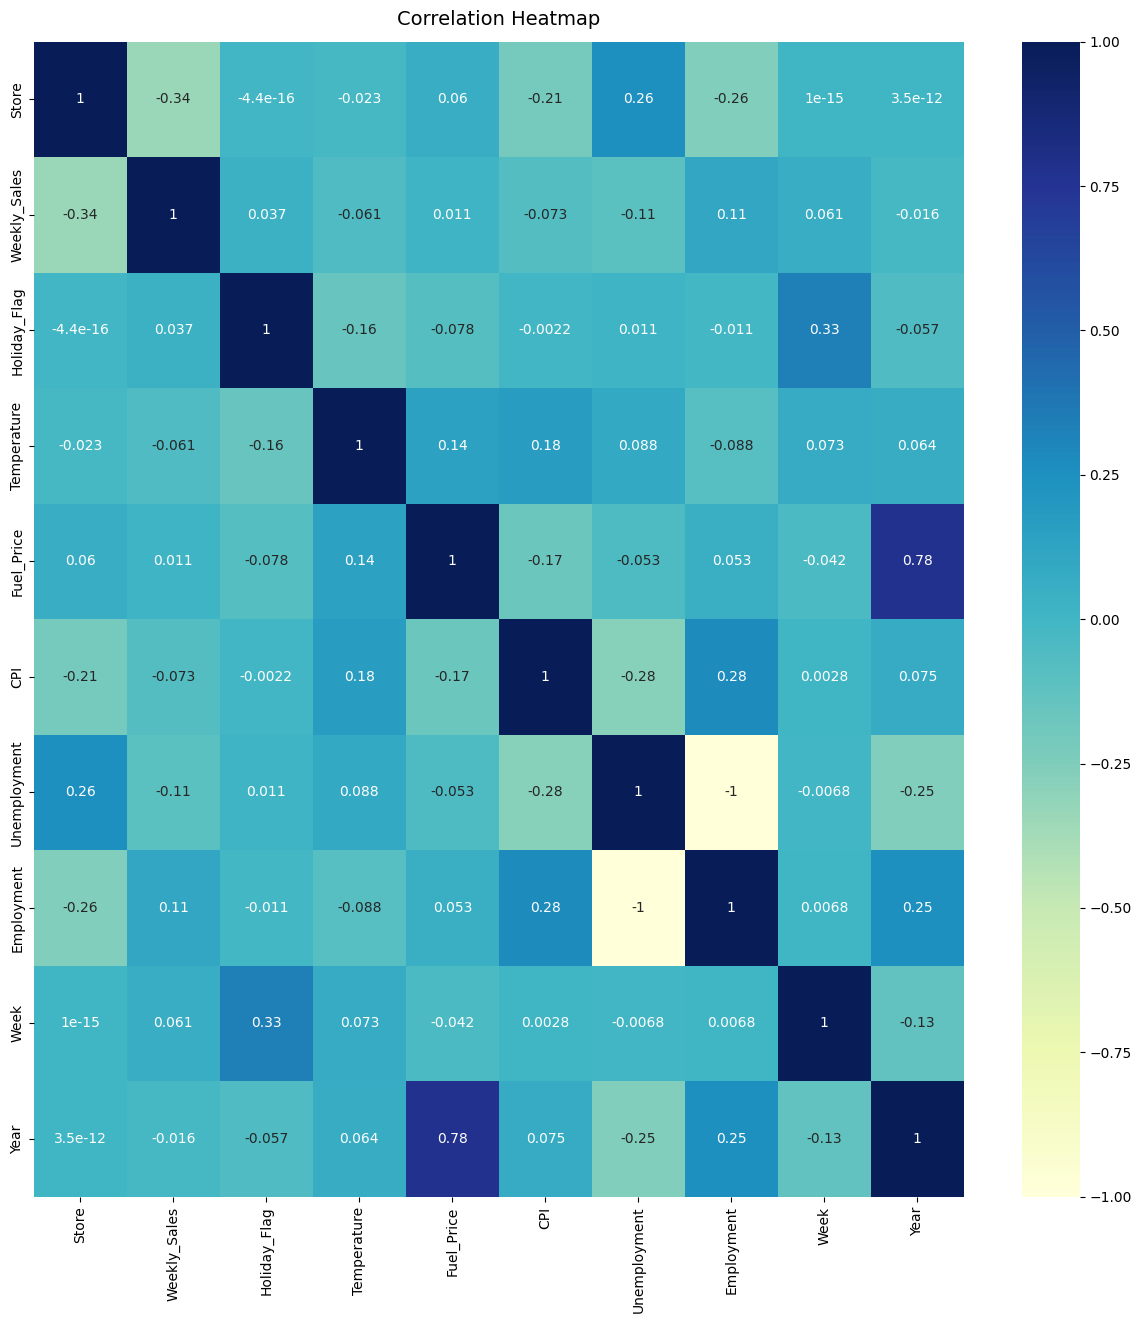

In [35]:
fig, ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(df3.corr(), vmin=-1, vmax=1, annot=True, cmap ="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

##Import the regressors

In [36]:
#import the regressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [37]:
df_copy = df2.copy()
df_copy.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,91.894,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,91.894,0,18,5,2010


In [38]:
df_copy.dtypes

Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Employment      float64
Day               int64
Week              int64
Month             int64
Year              int64
dtype: object

In [39]:
x = df_copy.drop(['Weekly_Sales'],axis=1)
y = df_copy['Weekly_Sales']

In [40]:
from sklearn.preprocessing import StandardScaler  
st = StandardScaler()
x_scaled = st.fit_transform(x)

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state= 42)

In [42]:
def model(y_test,y_train,x_test,x_train,model):
    
    model1 = model()
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("RMSLE:",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

In [43]:
x = [model(y_test,y_train,x_test,x_train,i) for i in [LinearRegression,Lasso,Ridge,ElasticNet,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor]]
x

-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
MSE: 264219537481.3273
MAE: 431547.056337389
RMSE: 514022.8958726715
RMSLE: 13.150023087944586
R2 : 15.41 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
-----------------
MSE: 264737375720.92532
MAE: 431432.0331513191
RMSE: 514526.36056952935
RMSLE: 13.151002068258684
R2 : 15.25 %
-----------------
<class 'sklearn.linear_model._ridge.Ridge'>
-----------------
MSE: 264722057164.92804
MAE: 431423.66775810823
RMSE: 514511.47427917295
RMSLE: 13.150973135813533
R2 : 15.25 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
-----------------
MSE: 272315241590.14612
MAE: 441052.8643107939
RMSE: 521838.32897761173
RMSLE: 13.165113104291027
R2 : 12.82 %
-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
MSE: 14639544696.402338
MAE: 68151.94087406757
RMSE: 120993.98619932454
RMSLE: 11.703496122511723
R2 : 9

[None, None, None, None, None, None, None, None]

##Apply Time Series

In [44]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 88.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826637 sha256=ec0b30db547b791987f6d16796a599c024fbc7e001f58f6a60d3b108250df6c9
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436070 sha256=ecf9469cbcc6297f7ebe631952461cef380a08c96e4f1e2b34f1f24d09ea8764
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [45]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,91.894
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,91.894
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,91.894
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,91.894
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,91.894


In [46]:
df['Date'] = pd.to_datetime(df['Date'])

In [47]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Employment             float64
dtype: object

In [48]:
from fbprophet import Prophet

In [49]:
Weekly_sales = df.groupby('Date').sum()['Weekly_Sales'].reset_index()

In [50]:
Weekly_sales.columns = ['ds', 'y']
Weekly_sales['ds']= pd.to_datetime(Weekly_sales['ds'])

In [51]:
m = Prophet(interval_width=0.95)
m.fit(Weekly_sales)
future=m.make_future_dataframe(periods=90)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
228,2013-03-06
229,2013-03-07
230,2013-03-08
231,2013-03-09
232,2013-03-10


In [52]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
228,2013-03-06,4.604345e+07,3.888607e+07,5.331514e+07
229,2013-03-07,4.706741e+07,3.943003e+07,5.411807e+07
230,2013-03-08,4.679496e+07,3.945880e+07,5.387233e+07
231,2013-03-09,4.545835e+07,3.849410e+07,5.220708e+07
232,2013-03-10,4.900384e+07,4.226188e+07,5.628479e+07


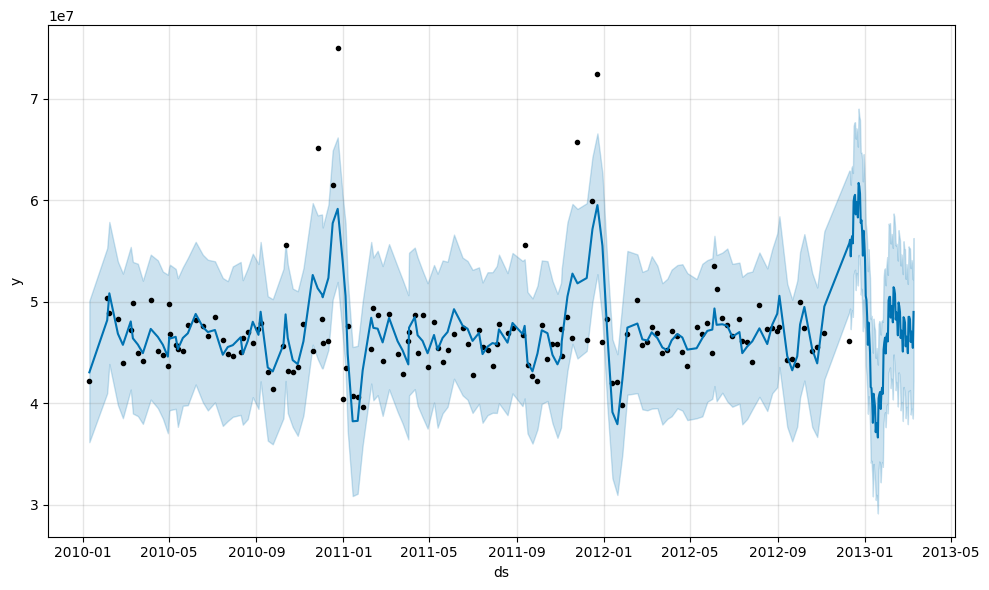

In [53]:
Weekly_sales_forecast_plot = m.plot(forecast)

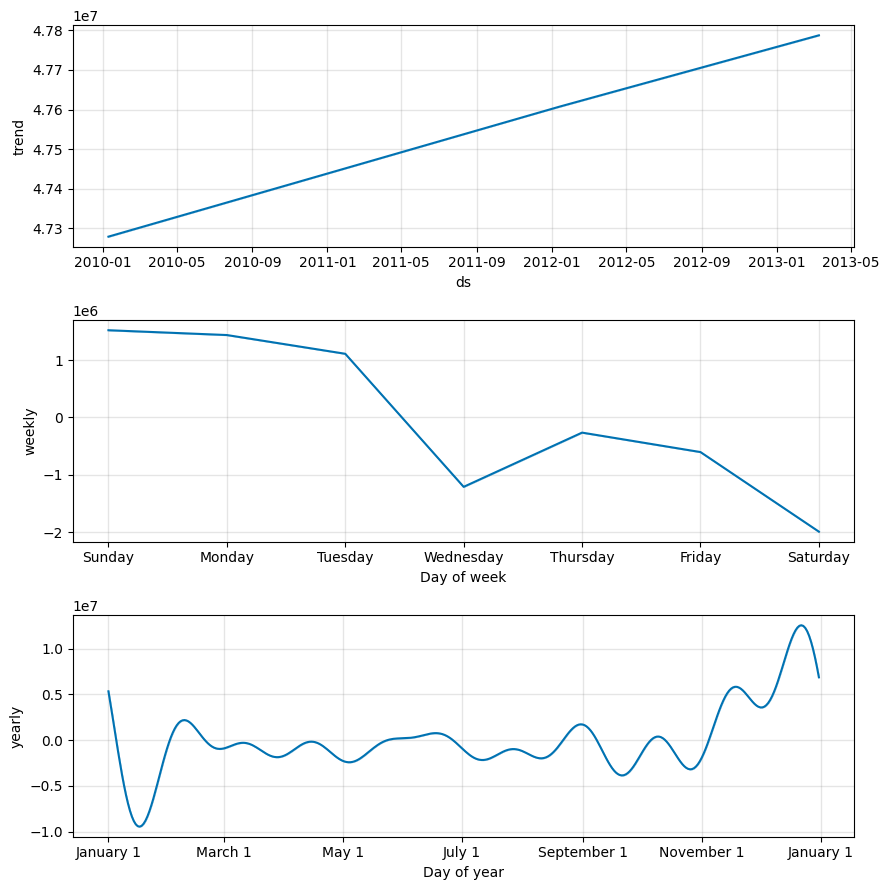

In [54]:
Weely_sales_forecast_plot = m.plot_components(forecast)

Our analysis shows that 2011 has the most sales occurred and also sales during April month is significantly higher than other months, with 9.79%.

The middle of the week day on Thursday 67.13% compared to others day it is almost 10X times more sales occurred.

Also our analysis shows that sales during holidays weeks are significantly higher than during non-holidays weeks, with the sales doubling on average. Additionally, there is a strong seasonal component to the data. The average sales of the top performing stores are up to 500% higher than lowest performing stores.

The best model for predicting future sales is Random Forest Regressor, Which gives 95.33% accurate Walmart Sales Predictions.
